In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression


%matplotlib inline

# 1. Dataset and Grades Overview

In [3]:
df= pd.read_csv('student_data.csv')
df.shape


(395, 33)

### There are 395 rows and 33 columns in the data set.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

### No null cells. 
### Some titles are quiet Vague. Detailed Description of each title:
#### ________________________________________________________________________________

#### school : Student’s school

#### sex : Student’s Gender

#### age : Student’s age

#### address : Student’s home address

#### famsize : Family size (Greater than 3 or Less than 3)

#### Pstatus : Parent’s relationship status (Together or Apart)

#### Medu : Mother’s education (From 1 to 5)

#### Fedu : Father’s education (From 1 to 5)

#### Mjob : Mother’s job 

#### Fjob : Father’s job 

#### reason : Reason to choose this school

#### guardian : Student’s guardian

#### traveltime : Home to school travel time ( 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

#### studytime : Weekly study time (1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

#### failures : Number of past class failures 

#### schoolsup : Extra educational support

#### famsup : Family educational support

#### paid : Extra paid classes within the course subject

#### activities :  External activities

#### nursery : Attended nursery school 

#### higher : Wants to take higher education

#### internet : Internet access 

#### romantic : Involved in a romantic relationship

#### famrel : Strength of family relationships

#### freetime : Free time after school 

#### goout : Going out with friends 

#### Dalc : Workday alcohol consumption

#### Walc : Weekend alcohol consumption 

#### health : Health status

#### absences : Number of times the student is absent from school. 

#### G1 : First period grade (Out of 20)

#### G2 : Second period grade (Out of 20)

#### G3 : Final grade (Out of 20 )

## 1.1 Average Grades and STD, Mean of Average Grades.

In [5]:
average_grades= round((df.G1 + df.G2 + df.G3) / 3, 1)
df['average_grades'] = average_grades
std = np.std(df["average_grades"])
mean = np.mean(df["average_grades"])
df.sample(7)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,average_grades
269,GP,F,18,R,GT3,T,2,1,other,other,...,3,5,1,2,3,0,6,0,0,2.0
351,MS,M,17,U,GT3,T,3,3,health,other,...,5,4,2,3,3,2,13,13,13,13.0
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,6,5,6,6,5.7
193,GP,M,16,R,GT3,T,3,3,services,services,...,3,2,3,4,5,8,8,9,10,9.0
233,GP,M,16,U,GT3,T,4,4,health,other,...,2,4,2,4,1,2,14,13,13,13.3
55,GP,F,16,U,GT3,A,2,1,other,other,...,3,4,1,1,2,8,8,9,10,9.0
72,GP,F,15,R,GT3,T,1,1,other,other,...,3,4,2,4,5,2,8,6,5,6.3


## 1.2 Boxplot of Average Grades

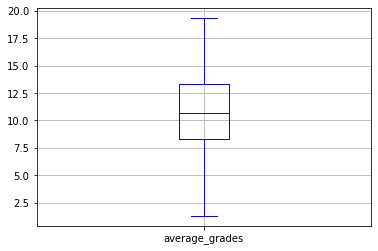

In [6]:
boxplot = df.boxplot(column=['average_grades'], color="blue")  

## 1.3 Normal Distribution of Average Grades

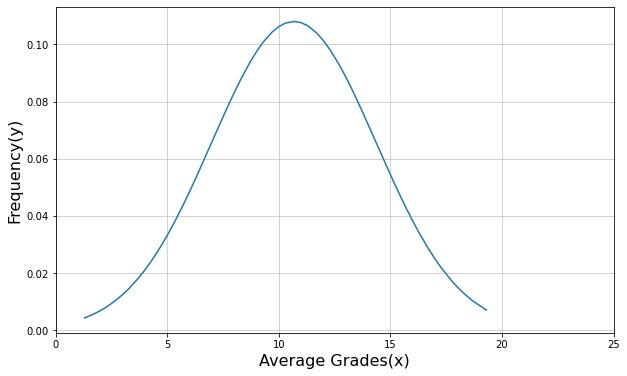

In [7]:
# Probability density function (PDF)
pdf = stats.norm.pdf(df["average_grades"].sort_values(), mean, std)

# Normal distribution shape
plt.figure(figsize=(10,6))
plt.plot(df["average_grades"].sort_values(), pdf)
plt.xlim([0,25])  
plt.xlabel("Average Grades(x)", size=16)    
plt.ylabel("Frequency(y)", size=16)                
plt.grid(True, alpha=0.7)
plt.show()

## 1.4 Median, Mode, Histogram of Grades

### 1.4.1 Histogram

<AxesSubplot:>

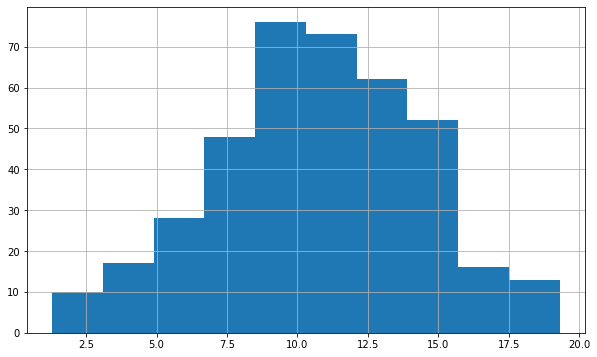

In [8]:
plt.figure(figsize=(10,6))
df['average_grades'].hist()

### 1.4.2 Median

In [9]:
np.median(df['average_grades'])

10.7

### 1.4.3 Mode

In [10]:
df['average_grades'].mode()

0    9.0
Name: average_grades, dtype: float64

#### Overall, most of the grades lie between approximately 8 and 13, the median grade is 10.7 and the most repeated grade is 9/20. 

## 1.5 Heat Map

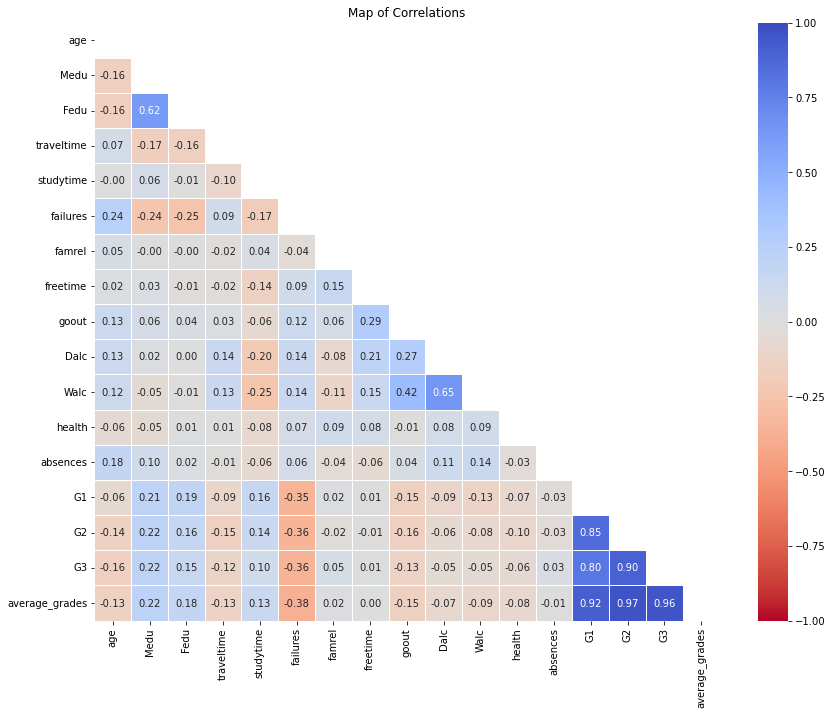

In [11]:
plt.figure(figsize = (14,11))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), mask=mask, center=0, cmap='coolwarm_r', linewidths=1, annot=True, fmt='.2f', vmin=-1, vmax=1)
plt.title('Map of Correlations')
plt.show()

# 2. Description of Data Set

## 2.1 Students' Health

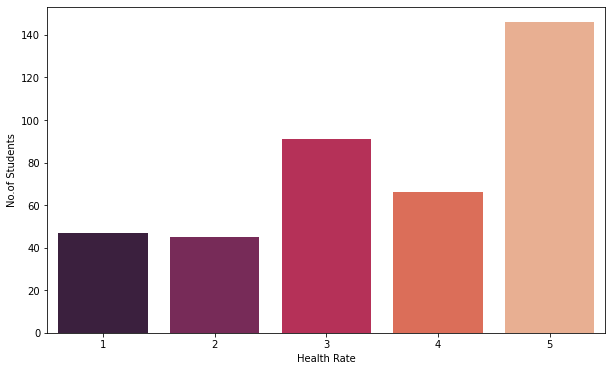

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(x='health', data = df, palette='rocket')
plt.xlabel("Health Rate")
plt.ylabel("No.of Students")

plt.show()

#### The majority of students have a good health. However, We cannot ignore that there a quite high number of average health students (3).

## 2.2 Students' Romantic Relationships

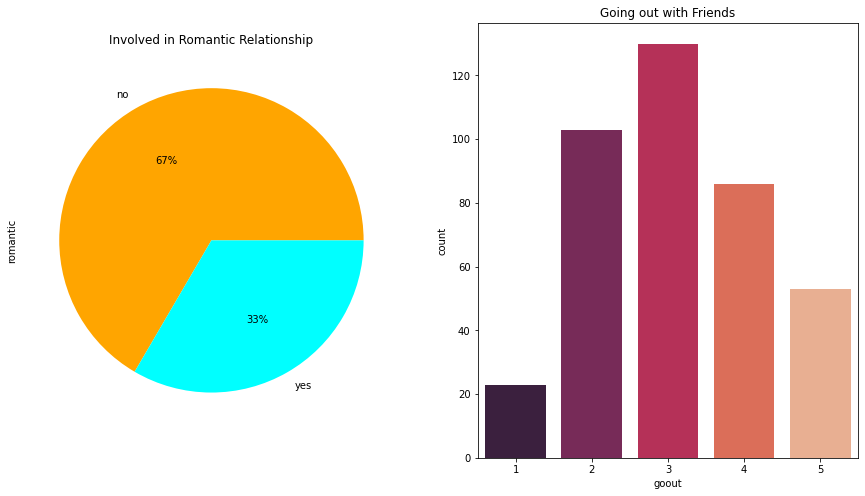

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
ax1 = df['romantic'].value_counts().plot(kind='pie', autopct='%.0f%%', colors=['orange', 'cyan'], ax= axes[0])
ax1.title.set_text('Involved in Romantic Relationship')
ax2 = sns.countplot(x='goout', data = df, palette='rocket', ax= axes[1])
ax2.title.set_text('Going out with Friends')

plt.show()

## 2.3 Parents' Jobs and Educational Level

### 2.3.1 Parents' Educational Level

Text(0.5, 1.0, 'Father Education')

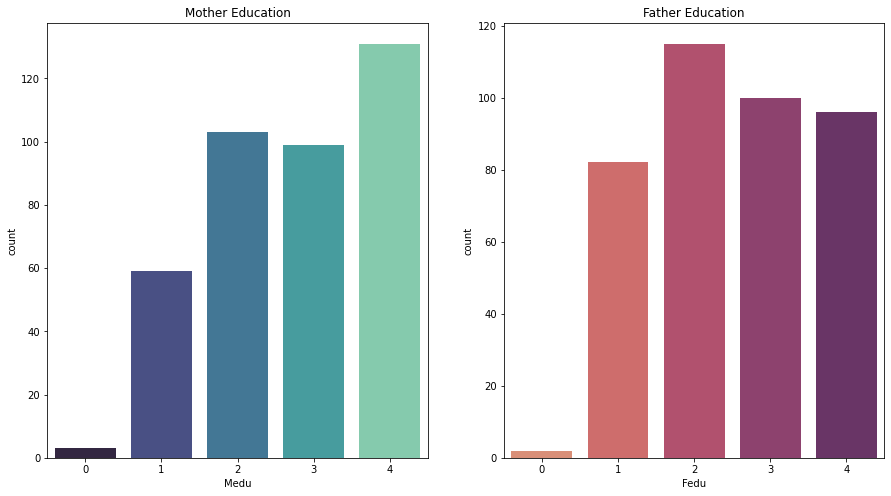

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.countplot(ax= axes[0], x='Medu', data = df, palette='mako')
axes[0].set_title('Mother Education')
sns.countplot(ax= axes[1], x='Fedu', data = df, palette='flare')
axes[1].set_title('Father Education')



### 2.3.2 Parents' Jobs

Text(0.5, 1.0, 'Father Jobs')

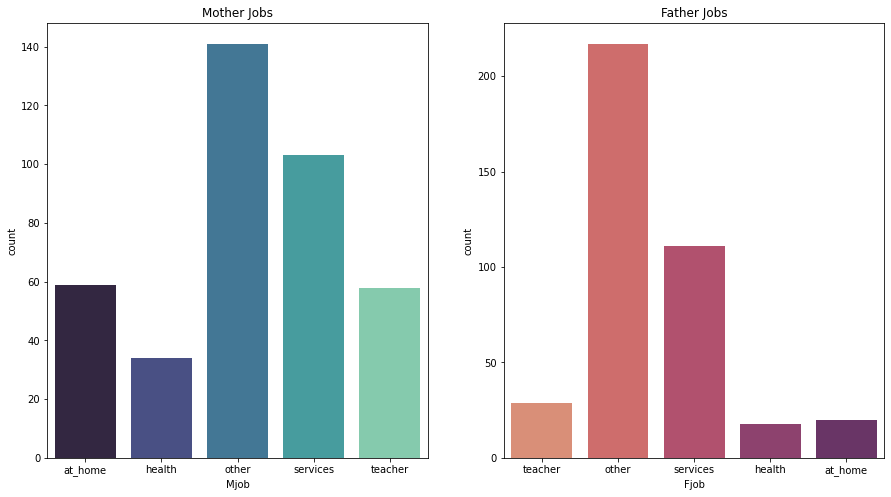

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.countplot(ax= axes[0], x='Mjob', data = df, palette='mako')
axes[0].set_title('Mother Jobs')
sns.countplot(ax= axes[1], x='Fjob', data = df, palette='flare')
axes[1].set_title('Father Jobs')



## 2.4 Activities and Free Time

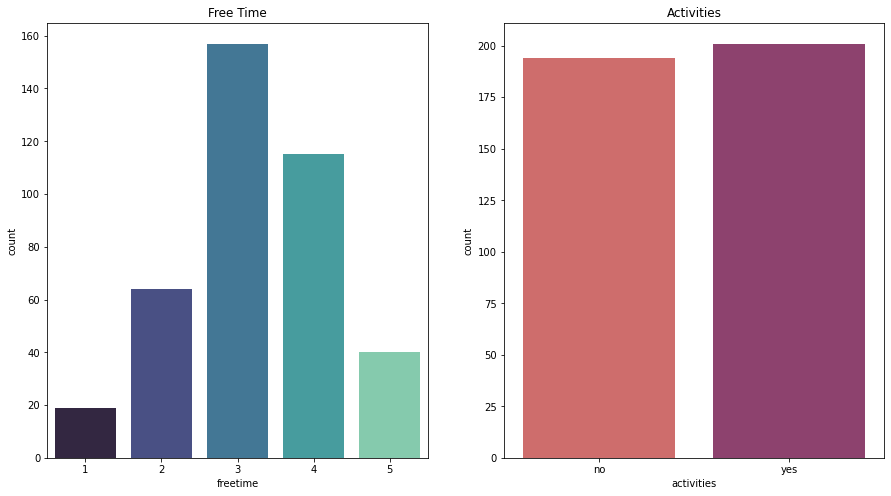

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
ax1 = sns.countplot(ax= axes[0], x='freetime', data = df, palette='mako')
ax1.title.set_text('Free Time')
ax2 = sns.countplot(ax= axes[1], x='activities', data = df, palette='flare')
ax2.title.set_text('Activities')

plt.show()

## 2.5 Students' Gender and Age

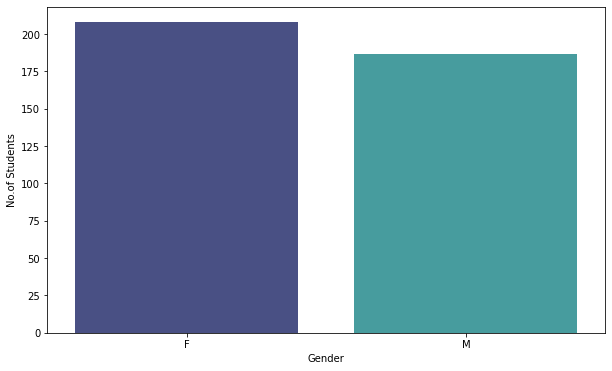

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='sex', data = df, palette='mako')
plt.xlabel("Gender")
plt.ylabel("No.of Students")
plt.show()


## 2.6 Students' Guardians

Text(0, 0.5, 'No.of Guardians')

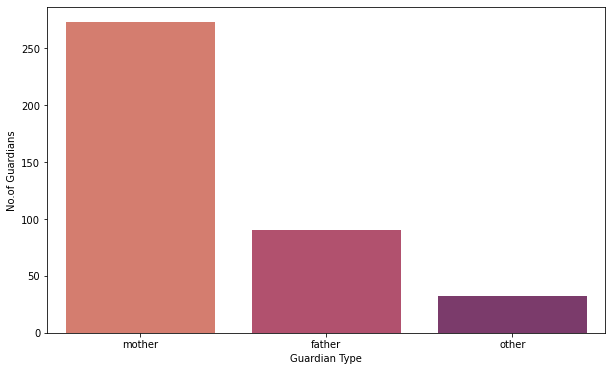

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='guardian', data = df, palette='flare')
plt.xlabel("Guardian Type")
plt.ylabel("No.of Guardians")

## 2.7 Students' Family Size, Parents Status and Family Relationship Quality

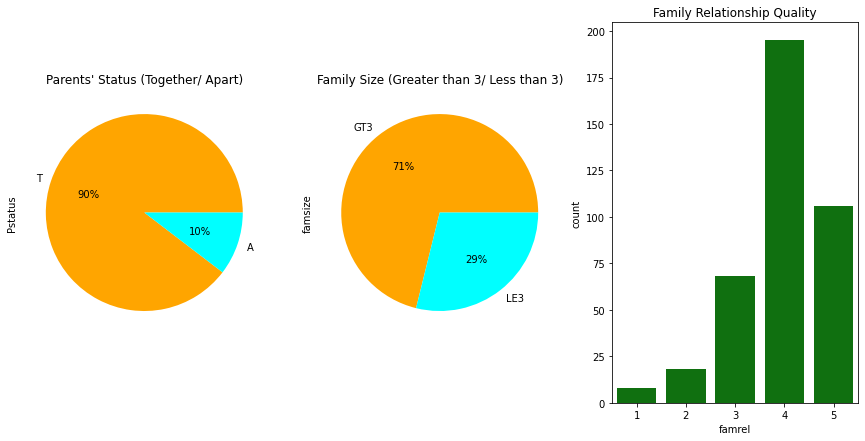

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(15, 7))
ax1 = df['Pstatus'].value_counts().plot(kind='pie', autopct='%.0f%%', colors=['orange', 'cyan'], ax = axes[0])
ax1.title.set_text('Parents\' Status (Together/ Apart)' )
ax2 = df['famsize'].value_counts().plot(kind='pie', autopct='%.0f%%', colors=['orange', 'cyan'], ax = axes[1])
ax2.title.set_text('Family Size (Greater than 3/ Less than 3)' )
ax3 = sns.countplot(ax = axes[2], x='famrel', data = df, color='g')
ax3.title.set_text('Family Relationship Quality' )


#### Most of student's parents are together. About 70% of student's family size are greater than 3 members. 
#### In addition, Most of the students rated their family relationship quality 4/5 and 5/5, Which means it is pretty good.

## 2.9 Travel Time and Study Time

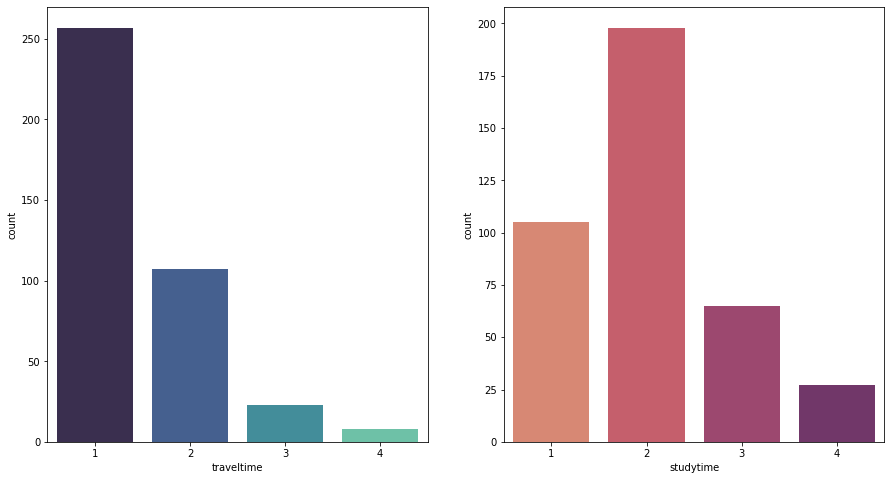

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.countplot(ax= axes[0], x='traveltime', data = df, palette='mako')
sns.countplot(ax= axes[1], x='studytime', data = df, palette='flare')
plt.show()

## 2.10 Workday and Weekend Alcohol Consumption

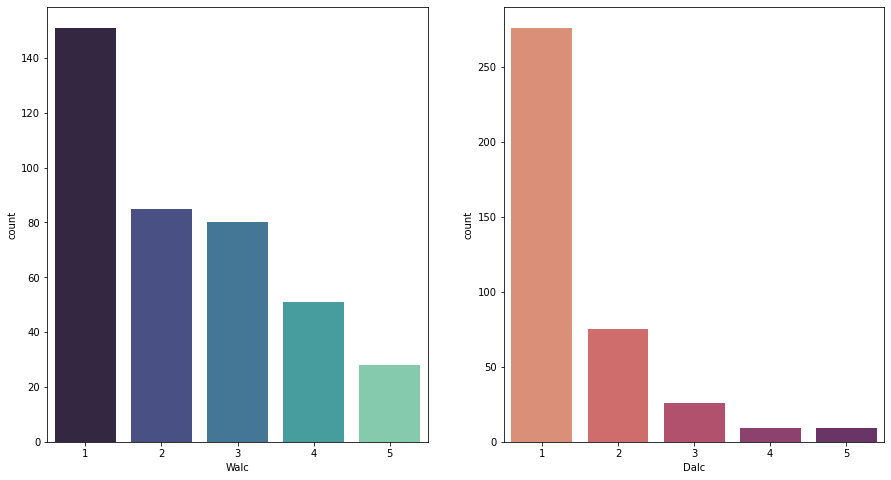

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
sns.countplot(ax= axes[0], x='Walc', data = df, palette='mako')
sns.countplot(ax= axes[1], x='Dalc', data = df, palette='flare')
plt.show()

### Students tend to consume alcoholic drinks more during weekends.

## 2.11 School and Family Support

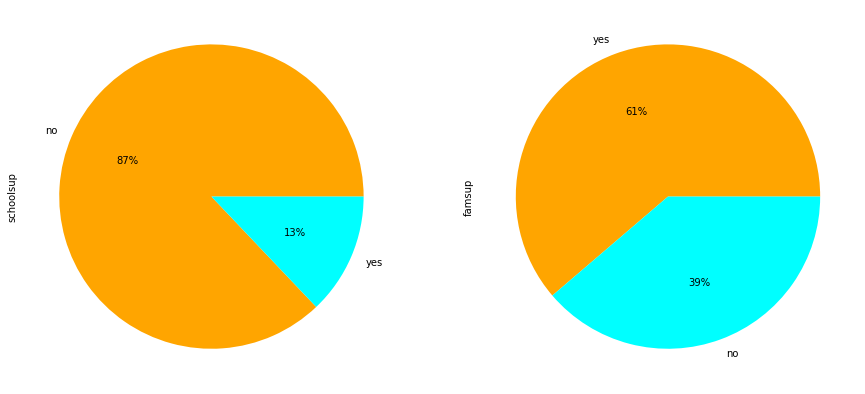

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
df['schoolsup'].value_counts().plot(kind='pie', autopct='%.0f%%', ax= axes[0], colors=['orange', 'cyan'])
df['famsup'].value_counts().plot(kind='pie', autopct='%.0f%%', ax= axes[1], colors=['orange', 'cyan'])
plt.show()

### A huge majority of students feel not supported by their school, while majority of them feel supported by their family.

## 2.12 Students who Failed Before

In [23]:
df["failed_before"] = 0

In [24]:
for i in  df['failures'].index:
    if df['failures'][i] > 0:
        df['failed_before'][i] ="Yes";
    else:
        df['failed_before'][i] = "No";

C:\Users\tanta\AppData\Local\Temp\ipykernel_3404\1155424143.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['failed_before'][i] = "No";


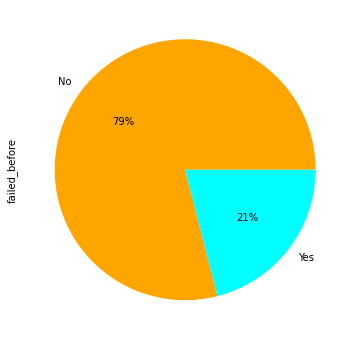

In [25]:
plt.figure(figsize=(10,6))
df['failed_before'].value_counts().plot(kind='pie', autopct='%.0f%%', colors=['orange', 'cyan'])
plt.show()


#### Majority of the students did not fail the class before.

## 2.13 School and Aim to Continue Higher Education

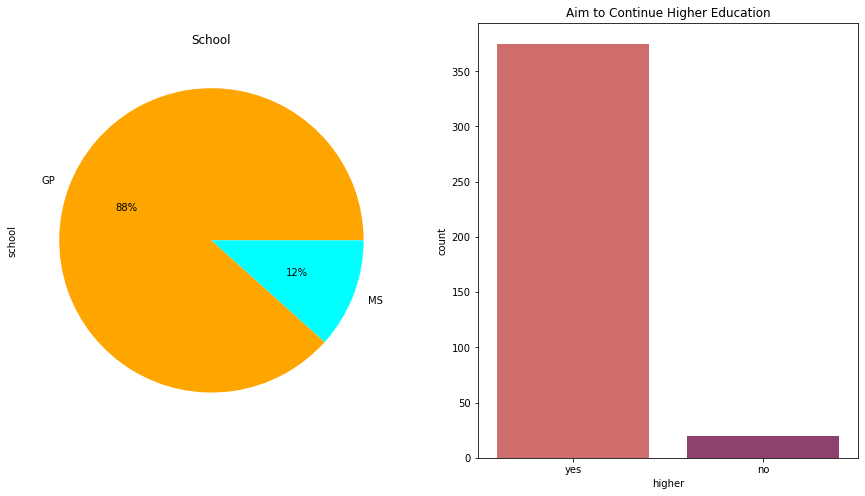

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(15, 8))
ax1 = df['school'].value_counts().plot(kind='pie', autopct='%.0f%%', colors=['orange', 'cyan'], ax= axes[0])
ax1.title.set_text('School')
ax2 = sns.countplot(x='higher', data = df, palette='flare', ax= axes[1])
ax2.title.set_text('Aim to Continue Higher Education')

plt.show()

# 3. Relationship between Grades and other Factors

## 3.1 Absence and Grades

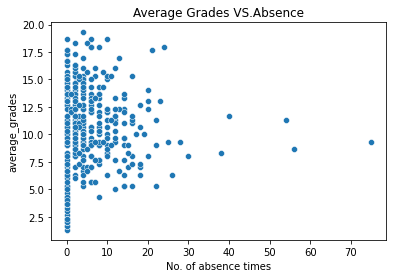

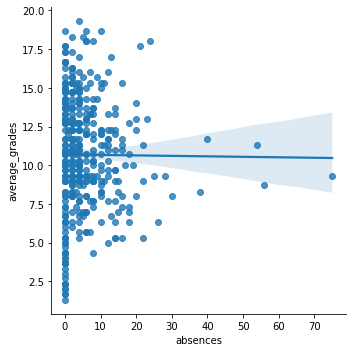

In [27]:
y = df['average_grades']
X = df['absences']
abc = sns.scatterplot(x=X, y=y, data=df)
abc.set_title("Average Grades VS.Absence")
abc.set_xlabel("No. of absence times")
sns.lmplot(x="absences", y="average_grades", data=df);


#### There's no clear relationship between absence and grade performance. In other words, absence does not have an impact on grades.

## 3.2 Guardian and Grades

<AxesSubplot:xlabel='guardian', ylabel='average_grades'>

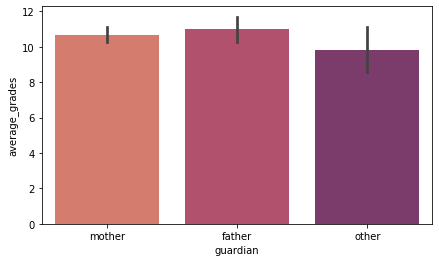

In [28]:
plt.figure(figsize=(7,4))
sns.barplot(x= 'guardian', y = 'average_grades', data = df, palette="flare")


#### Students with parent guardians have higher average grades than other students.

## 3.3 Romantic Relationships and Grades

<AxesSubplot:xlabel='romantic', ylabel='average_grades'>

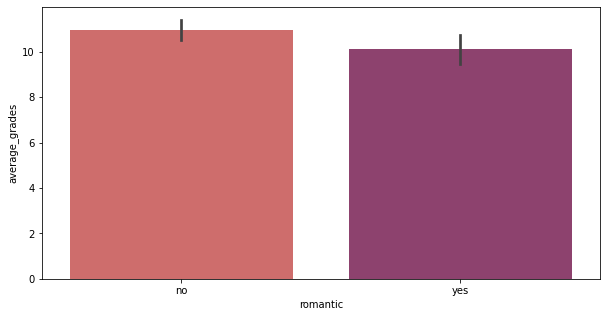

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x= 'romantic', y = 'average_grades', data = df, palette="flare")

#### Students who are not involved in romantic relationships score slightly higher than their fellow involved students.

## 3.4 Study Time and Grades

### 3.4.1 Study Time and no. of Failures

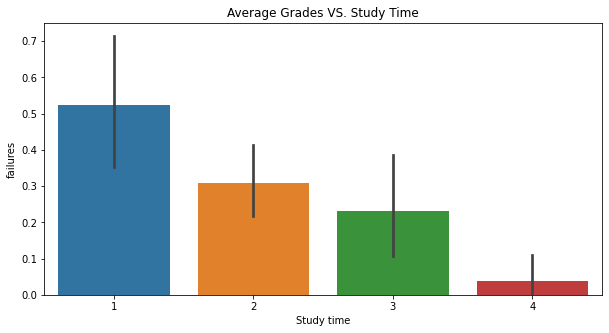

In [30]:
plt.figure(figsize=(10,5))
st = sns.barplot(x="studytime", y="failures", data=df)

st.set_title("Average Grades VS. Study Time")
st.set_xlabel("Study time")
plt.show()

#### As study time in hours increase, the number of failures decrease. 

### 3.4.2 Study Time impact on Average Grades.

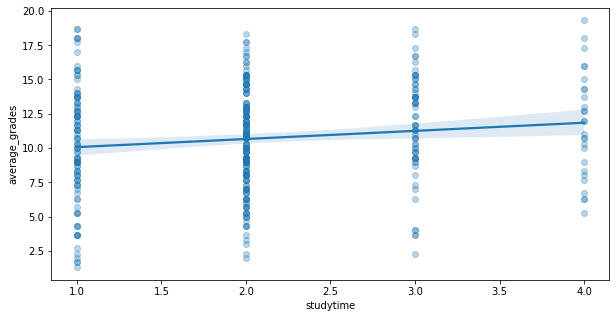

In [31]:
plt.figure(figsize=(10,5))
sns.regplot(x=df["studytime"], y=df["average_grades"], scatter_kws={'alpha':0.3})
plt.show()


#### As the study time increases, the average grade os a student slightly increases.

## 3.5 Parents Status, Education and Grades

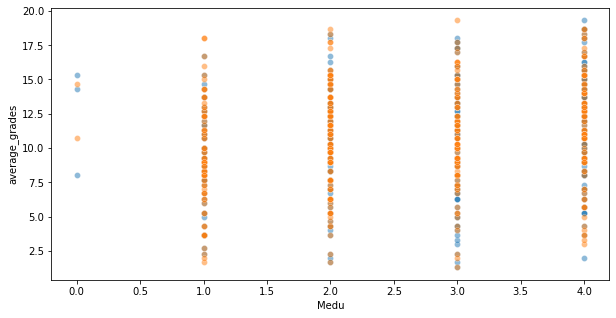

In [32]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Medu', y = 'average_grades', data = df, alpha=0.5)
sns.scatterplot(x = 'Fedu', y = 'average_grades', data = df, alpha=0.5)
plt.show()

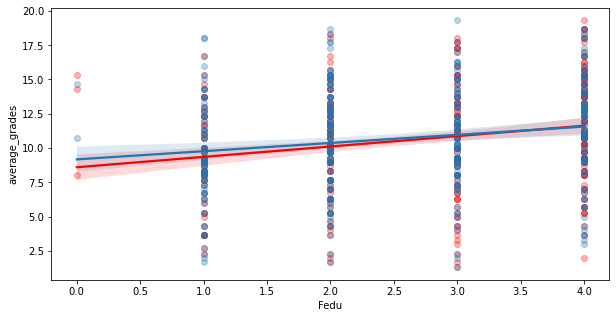

In [33]:
plt.figure(figsize=(10,5))
sns.regplot(x=df["Medu"], y=df["average_grades"], color="red", scatter_kws={'alpha':0.3})
sns.regplot(x=df["Fedu"], y=df["average_grades"], scatter_kws={'alpha':0.3})
plt.show()



#### It seems that parents education has a positive impact on students grade.

## 3.6 Alcohol Consumption and Grades

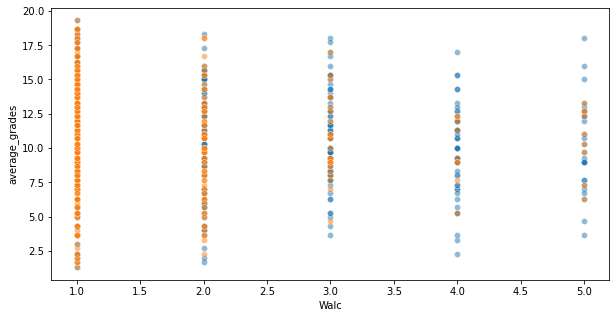

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Walc', y = 'average_grades', data = df, alpha=0.5)
sns.scatterplot(x = 'Dalc', y = 'average_grades', data = df, alpha=0.5)
plt.show()



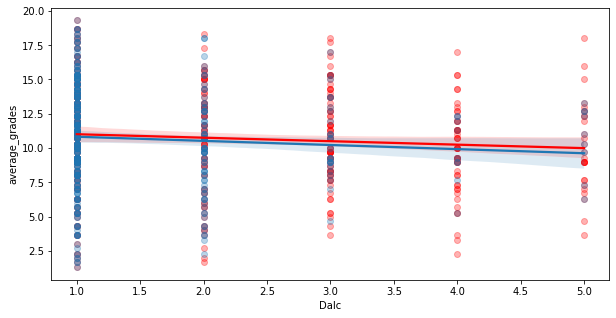

In [35]:
plt.figure(figsize=(10,5))
sns.regplot(x=df["Walc"], y=df["average_grades"], color="red", scatter_kws={'alpha':0.3})
sns.regplot(x=df["Dalc"], y=df["average_grades"], scatter_kws={'alpha':0.3})
plt.show()


#### As the amount of alcohol consumption increase, student grades slightly decrease.

## 3.6 Aim for Higher Education and Grades


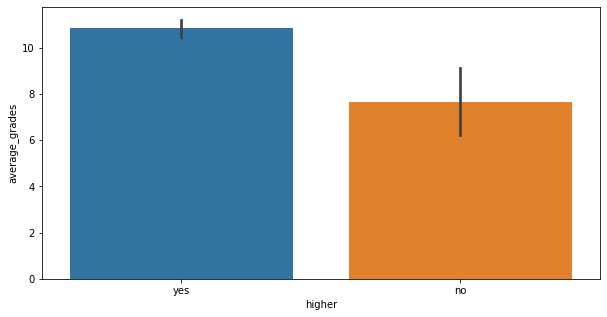

In [36]:
plt.figure(figsize=(10,5))
st = sns.barplot(x="higher", y="average_grades", data=df)
plt.show()


#### Students who aim to continue higher education score higher than these who do not aim for it.

## 3.7 Support and Grades


### 3.7.1 Family Support and Grades

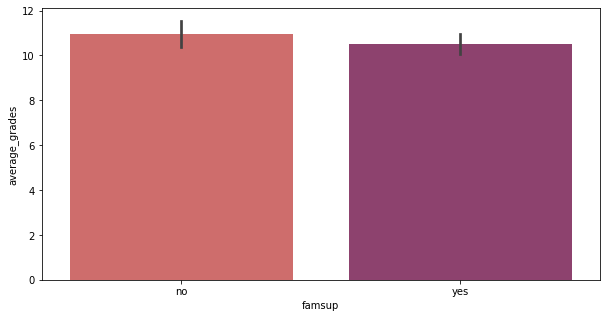

In [37]:
plt.figure(figsize=(10,5))
st = sns.barplot(x="famsup", y="average_grades", data=df, palette="flare")
plt.show()


### 3.7.2 School Support and Grades

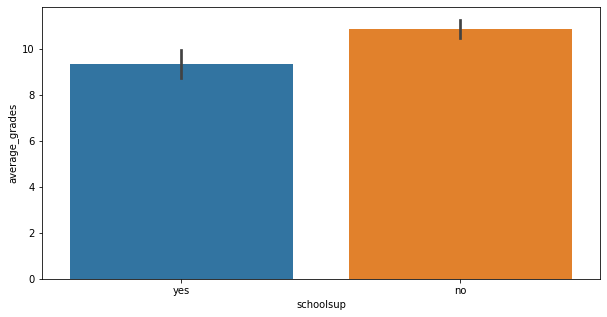

In [38]:
plt.figure(figsize=(10,5))
st = sns.barplot(x="schoolsup", y="average_grades", data=df)
plt.show()


#### Students who do not recieve support tend to score higher grades.

## Health and Grades

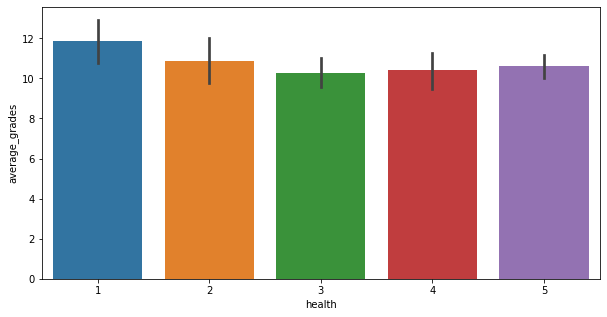

In [39]:
plt.figure(figsize=(10,5))
st = sns.barplot(x="health", y="average_grades", data=df)
plt.show()


## 3.9 Going out With Friends and Grades

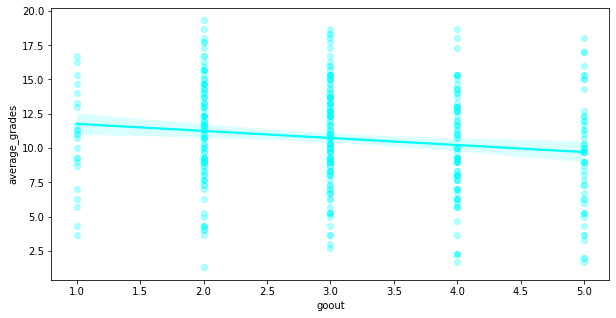

In [40]:
plt.figure(figsize=(10,5))
sns.regplot(x=df["goout"], y=df["average_grades"], color="cyan", scatter_kws={'alpha':0.3})
plt.show()


## 3.10 Family Relationship and Grades

### 3.10.1 Family Relationship Quality and Grades

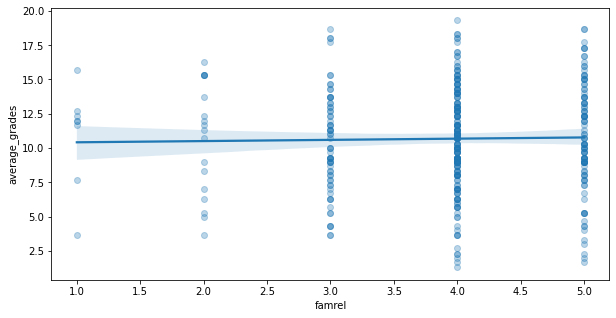

In [41]:
plt.figure(figsize=(10,5))
sns.regplot(x=df["famrel"], y=df["average_grades"], scatter_kws={'alpha':0.3})
plt.show()

### It seems that family relationship quality does not affect grades.

### 3.10.2 Parents' Status and Grades

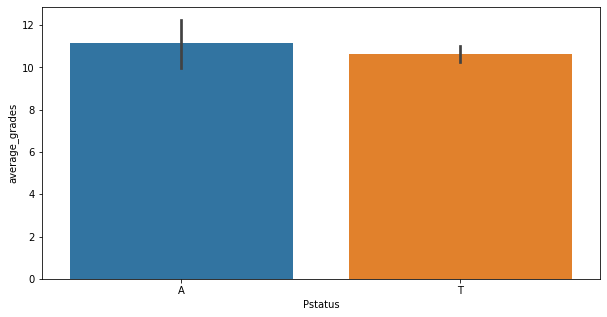

In [42]:
plt.figure(figsize=(10,5))
st = sns.barplot(x="Pstatus", y="average_grades", data=df)
plt.show()


## 3.11 Age and Grades

Text(0.5, 1.0, 'Age influence to exam score')

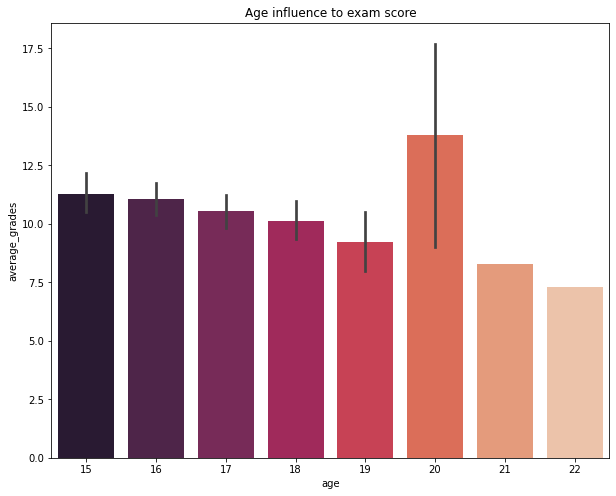

In [43]:
plt.figure(figsize=(10,8))
sns.barplot( x='age', y='average_grades', data= df, palette = "rocket")
plt.title('Age influence to exam score')

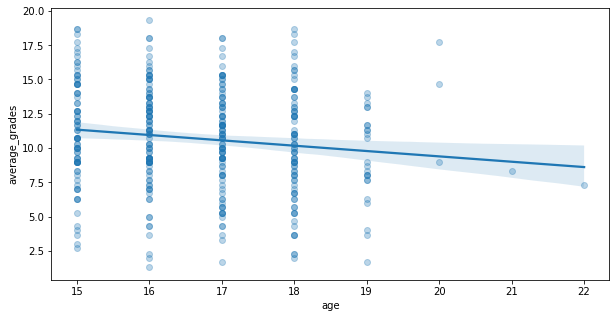

In [44]:
plt.figure(figsize=(10,5))
sns.regplot(x=df["age"], y=df["average_grades"], scatter_kws={'alpha':0.3})
plt.show()

#### Although 20 years old students score higher than other students, as age increases, students tend to score lower.

## 3.12 School and Grades

Text(0.5, 1.0, 'Age influence to exam score')

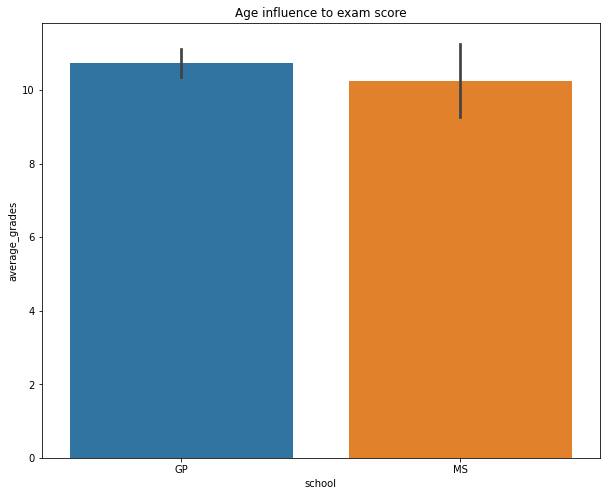

In [45]:
plt.figure(figsize=(10,8))
sns.barplot( x='school', y='average_grades', data= df)
plt.title('Age influence to exam score')

#### GP students have higher average grades than MS. 